<a href="https://colab.research.google.com/github/AlyW8/Data-Science/blob/main/AlysWangU5Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U5proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU5proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU5proj.ipynb"

# Unit 5 Project: Making a Generalized Linear Model (1 predictor)

**Task**:

Two parts:

1. Propose a data set that's compatible with a generalized linear model structure built with pymc. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a generalized linear model using pymc within the colab environment, on a data set of your choice.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Linear models are generalized linear models. This is not a competition to come up with the most complicated heirearchical glm. **Find a data set that interests you, and apply the simplest model that captures the patterns in the data.**

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit5NotesAK *is* your example! You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


# Project: World Peace

A country's GDP, or Gross Domestic Product, is a measure of the value of all goods and services produced within that country at a given time. It's commonly used as a measure of that country's economic health. The larger the GDP, the healthier the economy. The GPI, or Global Peace Index, is a ranking decided by the Institute for Economics and Peace measuring the relative peacefulness of countries. The lower the GPI, the more peaceful the country. Since the most peaceful countries seem to be the richest (at least from my biased preconceptions), I wanted to see if a country's GDP could measure peacefulness.

## Data

I got my data from https://worldpopulationreview.com/country-rankings/safest-countries-in-the-world, which is honestly kind of a sketchy source. It gets its data from some other site that I didn't find, but I just used the numbers that they listed because I liked their table.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm
import xarray as xr
import graphviz as gv

from scipy.interpolate import PchipInterpolator

In [23]:
url_cdata = 'https://raw.githubusercontent.com/AlyW8/Data-Science/refs/heads/main/U5%20Proj%20Data%20-%20Data.csv'
cdata = pd.read_csv(url_cdata)


In [40]:
cdata

,Country,GDP,GPI
0,Albania,2.717774e+10,1.809
1,Algeria,2.636198e+11,2.110
2,Angola,8.039694e+10,2.043
3,Argentina,6.332667e+11,1.855
4,Armenia,2.578659e+10,2.052
...,...,...,...
144,Uruguay,8.096151e+10,1.893
145,Uzbekistan,1.149653e+11,1.957
146,Viet Nam,4.763882e+11,1.802
147,Zambia,2.632578e+10,1.948


<Axes: xlabel='GDP', ylabel='GPI'>

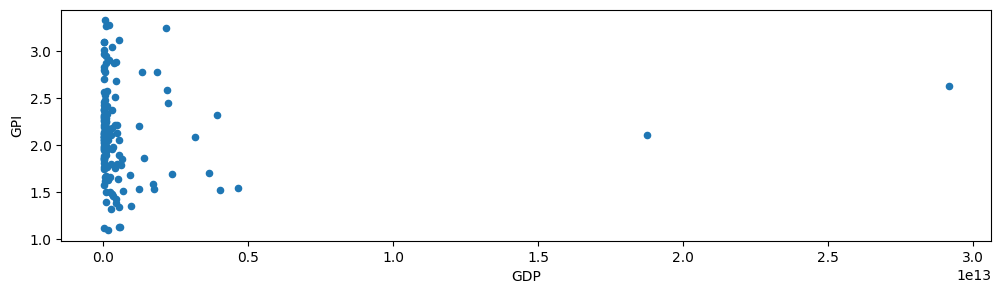

In [4]:
cdata.plot(x="GDP", y="GPI", figsize = (12,3), kind = "scatter")

Okay.... I probably should've expected that. I'll try to filter out the absurdly rich countries so they don't bias the model as much (I'm looking at you, USA, China).

In [33]:
cdata2 = cdata.query("1 <= GDP <= 10000000000000")
# Gemini used


In [51]:
cdata2

,Country,GDP,GPI
0,Albania,2.717774e+10,1.809
1,Algeria,2.636198e+11,2.110
2,Angola,8.039694e+10,2.043
3,Argentina,6.332667e+11,1.855
4,Armenia,2.578659e+10,2.052
...,...,...,...
144,Uruguay,8.096151e+10,1.893
145,Uzbekistan,1.149653e+11,1.957
146,Viet Nam,4.763882e+11,1.802
147,Zambia,2.632578e+10,1.948


<Axes: xlabel='GDP', ylabel='GPI'>

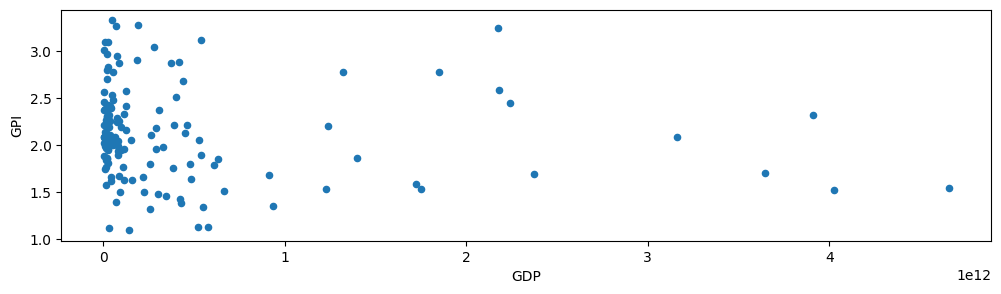

In [52]:
cdata2.plot(x="GDP", y="GPI", figsize =(12,3), kind = "scatter")

In [56]:
cdata3 = cdata.query("0 <= GDP<= 100000000000")

<Axes: xlabel='GDP', ylabel='GPI'>

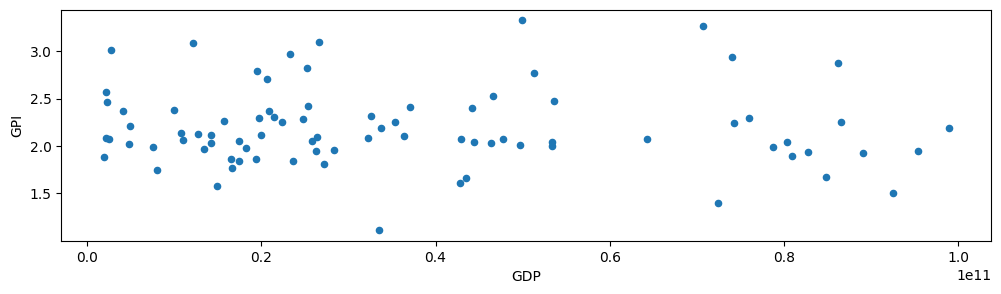

In [57]:
cdata3.plot(x="GDP", y="GPI", figsize =(12,3), kind = "scatter")

## Causal Diagram



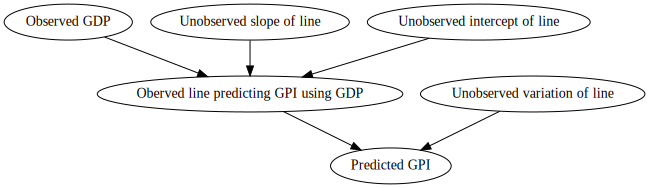

In [13]:
dag_b = gv.Digraph()

dag_b.node('D','Observed GDP')
dag_b.node('L','Oberved line predicting GPI using GDP')
dag_b.node('σ','Unobserved variation of line')
dag_b.node('β','Unobserved slope of line')
dag_b.node('α','Unobserved intercept of line')
dag_b.node('P','Predicted GPI')

dag_b.edges(['αL','βL','DL','LP','σP'])
dag_b

# Making the Model

In [ ]:
with pm.Model() as model_cdata2:

    #priors for the linear part of our model
    α = pm.Normal("α", mu=0, sigma=100)
    β = pm.Normal("β", mu=0, sigma=10)

    #this is the linear part of our model
    μ = pm.Deterministic("μ", α + β * cdata2.GDP)

    #prior for the standard deviation of our likelihood
    #Cauchy is a T dist with nu = 1
    σ = pm.HalfCauchy("σ", 10)

    #likelihood
    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed=cdata2.GPI)

    #inference data object
    idata_cdata2 = pm.sample()

In [ ]:
az.plot_posterior(idata_cdata2, var_names=["σ"])

### posterior predictive

In [ ]:
pm.sample_posterior_predictive(idata_cdata2, model=model_cdata2,  extend_inferencedata=True)

<Axes: xlabel='y_pred_observed'>

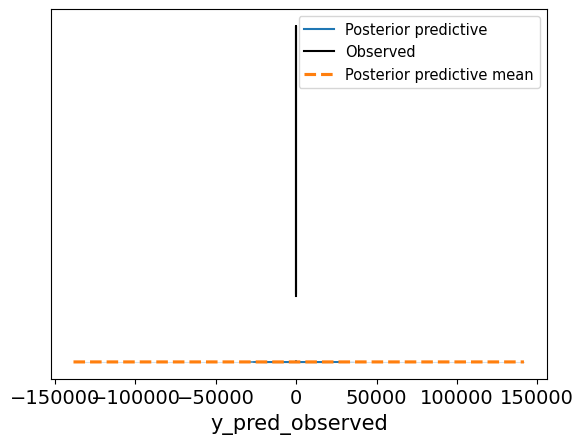

In [59]:
az.plot_ppc(idata_cdata2, num_pp_samples = 200)

Text(0, 0.5, 'GPI')

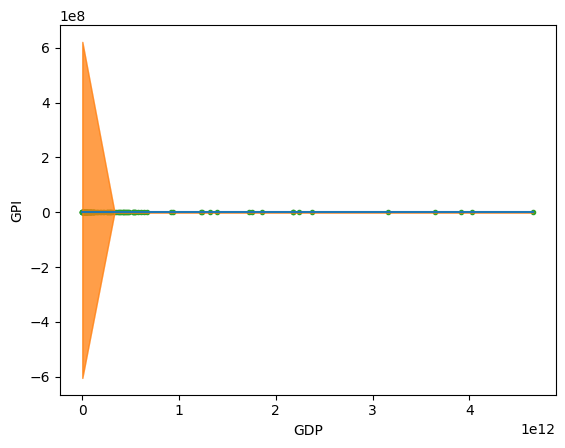

In [18]:
#plots the posterior predictive distribution

#grabs the expected line, or line of best fit formula
mean_line = idata_cdata.posterior["μ"].mean(("chain", "draw"))

#creates some x values to run through our line formula
GDP = np.random.normal(cdata.GDP.values, 0.01)
idx = np.argsort(GDP)
x = np.linspace(GDP.min(), GDP.max(), 15)

#grabs the 94% HDI and 50% HDI, and sets them up for graphing.
y_pred_q = idata_cdata.posterior_predictive["y_pred"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)
y_hat_bounds = iter(
    [
        PchipInterpolator(GDP[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)

#plots raw data and our line of best fit
_, ax = plt.subplots()
ax.plot(cdata.GDP, cdata.GPI, "C2.", zorder=-3)
ax.plot(GDP[idx], mean_line[idx], c="C0")


#graphs the 94% and 50% HDIs
for cdata, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, cdata, ub, color="C1", alpha=0.5)

#labels
ax.set_xlabel("GDP")
ax.set_ylabel("GPI")

## Analysis

My posterior predictive checks are really, really bad. I'm thinking that it's somehow trying to predict GDP instead of GPI from the large domain, but I can't find where in the code I've done something wrong. There might also be strange factors strongly influencing the data that I haven't found and taken care of yet.

Because my model is so bad, I can't make an accurate statement as to whether or not GDP and GPI have a relationship.